In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import json

In [16]:
#data_source = '../Money-Mavericks/data/data.csv'
data_source = './data/data.csv'
df = pd.read_csv(data_source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      5.577678e+08                4.6              4447207   
1      Alaska      1.778816e+08                6.6               626933   
2     Arizona      6.679765e+08                3.9              5130247   
3    Arkansas      3.284035e+08                4.4              2673293   
4  California      3.792097e+09                4.9             33871653   

   SNAPS household_participants  SNAPS individual_participants    SNAPS cost  \
0                   156104.5833                   3.960572e+05  3.437353e+08   
1                    13208.3333                   3.752433e+04  4.583456e+07   
2                    95567.5000                   2.590026e+05  2.402456e+08   
3                    98764.3333                   2.465715e+05  2.062364e+08   
4                   672007.0000                   1.830677e+06  1.639333e+09   

   SNAPS cost_per_person  SNAPS cost_per_household  Median Income  U

In [17]:
'''Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array
Each nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.
Should this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER
comment for easy lookup.'''

#Done

'Here, we read in a given cluster. For the sake of this, the code was pre-emptively written to expect a 2D array\nEach nested array will be considered a cluster, and will contain the names of all the states contained within the cluster.\nShould this change, our code will be editted to reflect this.  All areas where the cluster data are used will be marked with a #TODO_CLUSTER\ncomment for easy lookup.'

In [23]:
cluster_source = './data/clustered_states.json'
with open(cluster_source, 'r') as fp:
    data = json.load(fp)

clusters = []

for key, value in data.items():
    if(len(value) > 1):
        clusters.append(value)

print(clusters)

[['Colorado', 'Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maryland', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Wyoming'], ['Arizona', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maine', 'Massachusetts', 'New York', 'Oklahoma', 'Pennsylvania', 'Rhode Island', 'Texas'], ['Alabama', 'Alaska', 'California', 'Illinois', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'North Carolina', 'Ohio', 'Oregon', 'South Carolina', 'Tennessee', 'Washington', 'West Virginia']]


In [24]:
#Now for each cluster we create a separate x and y

In [25]:
df_by_cluster = []
for cluster in clusters:
    c_df = df.loc[df['State'].isin(cluster), :].copy()
    c_df = c_df.sample(frac=1).reset_index().drop(columns='index').dropna()
    x = c_df[["State", "Education Budget", "Unemployment Rate", "Population Estimate", "Year", "GDP", "# of Jobs (In Thousands)"]] 
    x = pd.get_dummies(data=x, drop_first=True)
    y = c_df["SNAPS cost"]
    df_by_cluster.append([x,y])

In [26]:
#Now that that's created, we're going to loop over each cluster and individually create a linear regression model for them.  

In [27]:
print(df_by_cluster[1])

[     Education Budget  Unemployment Rate  Population Estimate  Year  \
0        6.375493e+09                5.5              6167681  2008   
1        1.337089e+09                3.9              2989918  2016   
2        3.827931e+09                7.1              6713315  2013   
3        1.018177e+10               10.0              6343154  2010   
4        4.484933e+08                4.5               948921  2016   
..                ...                ...                  ...   ...   
248      6.182183e+08                5.1              2678588  2001   
249      1.132623e+10                4.3             28295273  2017   
250      2.608632e+09                5.0              6403290  2006   
251      3.951764e+09                5.0              6794228  2015   
252      2.484215e+09                4.2             20851028  2000   

              GDP  # of Jobs (In Thousands)  State_Arkansas  State_Delaware  \
0    2.808100e+11                    2672.2               0        

In [28]:
#setting up globals
cluster_models = []
cluster_parameters = [] #expecting [x_train, x_test, y_train, y_test]
cluster_predictions = []
cluster_ls = []

In [29]:
'''Now it's just linear regression, straight up and down.'''

"Now it's just linear regression, straight up and down."

CLUSTER 1 --------------------------------------------
Contains: 
['Colorado', 'Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maryland', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Wyoming']
                            OLS Regression Results                            
Dep. Variable:             SNAPS cost   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     237.4
Date:                Fri, 05 May 2023   Prob (F-statistic):          2.56e-194
Time:                        14:55:07   Log-Likelihood:                -6926.2
No. Observations:                 352   AIC:                         1.391e+04
Df Residuals:                     325   BIC:                         1.401e+04
Df Model:                          26           

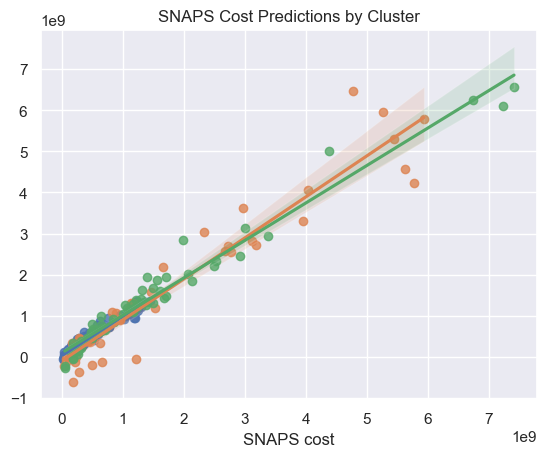

In [31]:
count = 1
sns.set()
for df_arr in df_by_cluster:
    print(f"CLUSTER {count} --------------------------------------------")
    print(f"Contains: \n{clusters[count - 1]}")
    x = df_arr[0]
    y = df_arr[1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)

    sns.regplot(x=y_test,y=predictions).set(title="SNAPS Cost Predictions by Cluster")
    #plt.legend(labels=["Cluster 1 Predictions", "Cluster 1 Trend", "Cluster 1 Spread", "Cluster 2 Predictions", "Cluster 2 Trend", "Cluster 2 Spread"])
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.OLS(y_train,X_train_Sm).fit()
    print(ls.summary())
    
    cluster_models.append(model)
    cluster_parameters.append([X_train, X_test, y_train, y_test])
    cluster_predictions.append(predictions)
    cluster_ls.append(ls)
    count += 1
    print("\n\n\n")

[Text(0.5, 1.0, 'Cluster 1 SNAPS predictions')]

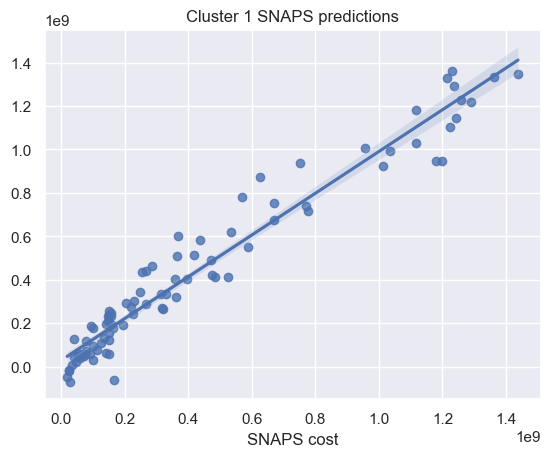

In [32]:
sns.regplot(x=cluster_parameters[0][3],y=cluster_predictions[0]).set(title="Cluster 1 SNAPS predictions")

[Text(0.5, 1.0, 'Cluster 2 SNAPS predictions')]

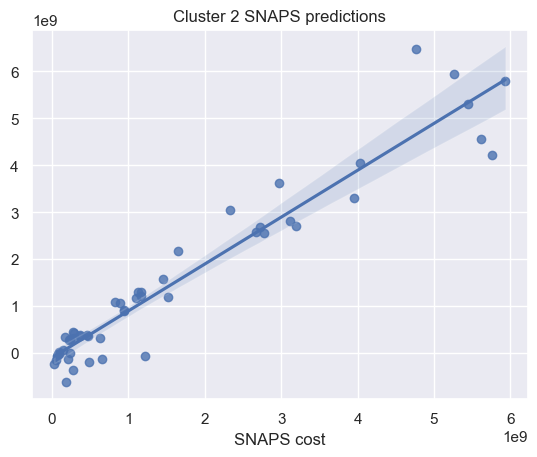

In [33]:
sns.regplot(x=cluster_parameters[1][3],y=cluster_predictions[1]).set(title="Cluster 2 SNAPS predictions")

[Text(0.5, 1.0, 'Cluster 3 SNAPS predictions')]

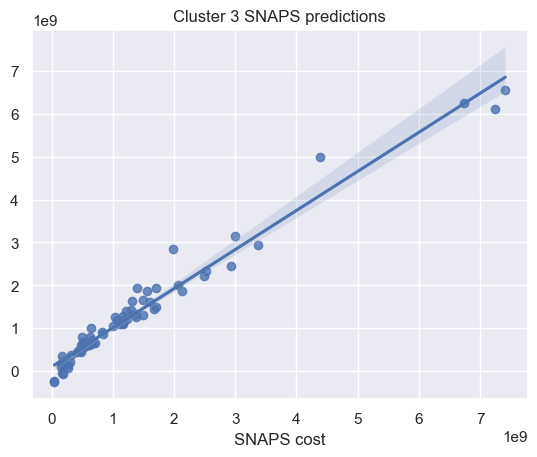

In [34]:
sns.regplot(x=cluster_parameters[2][3],y=cluster_predictions[2]).set(title="Cluster 3 SNAPS predictions")